# Lab 6

Question 1

In [ ]:
alpha = 0.2
beta = 0.5
chain = NULL
init_value=1

mpt = matrix(c(1-alpha, alpha, beta, 1-beta), nrow = 2)
print(mpt)

     [,1] [,2]
[1,]  0.8  0.5
[2,]  0.2  0.5


In [ ]:
# Simulations

for(t in 1:50){ 

  # init value
  if(t == 1) {
    chain = c(init_value)
  }

  else {
    chain = c(chain, sample(c(1,2),size=1,prob=mpt[chain[t-1],]) )
  }

  # print(chain)
  
}

In [ ]:
chain

[1] 1 2 2 2 2 1 1 2 1 2 2 2 2 2 2 2 1 1 2 1 2 2 2 2 2 1 1 1 2 2 2 1 1 2 2 2 2 2
[39] 2 2 1 2 2 1 2 2 2 2 2 2

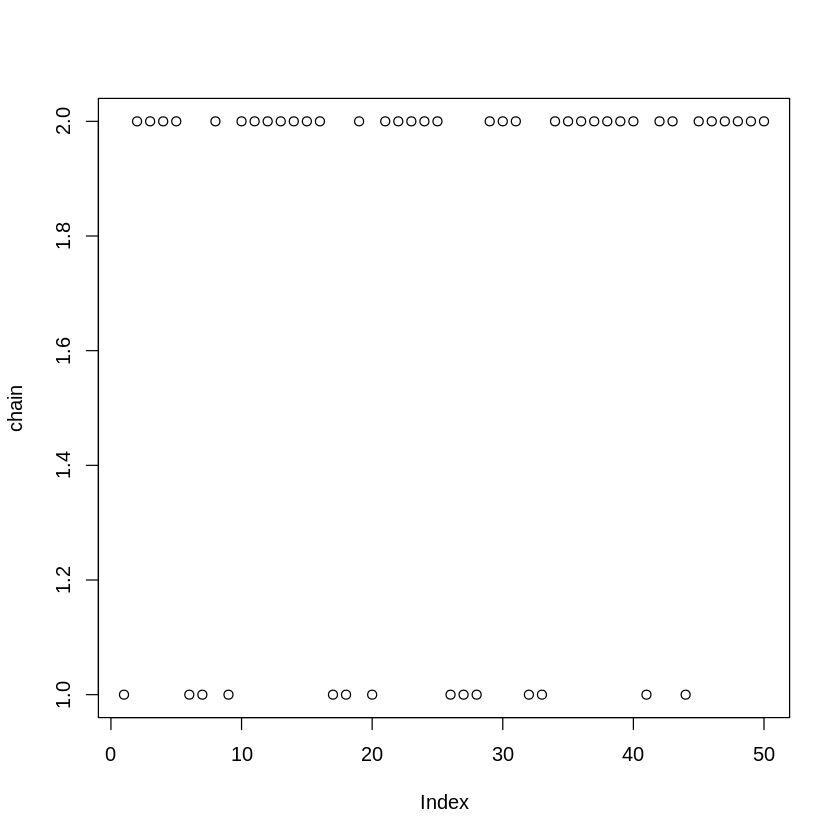

chain
 1  2 
14 36 

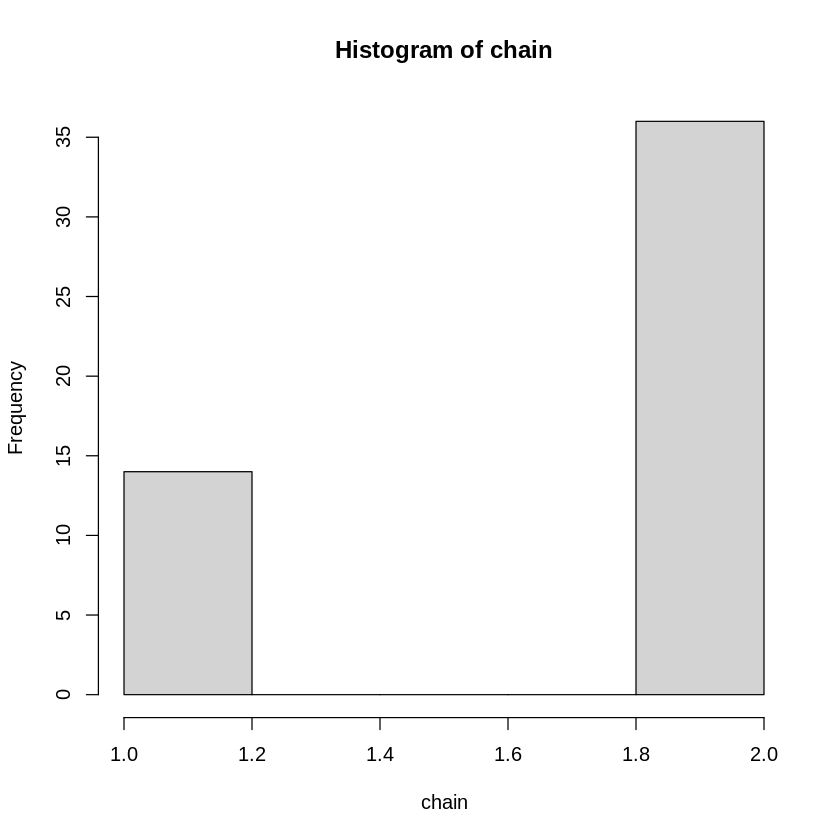

In [ ]:
plot(chain)
hist(chain)
table(chain)

In [ ]:
mpt[chain[t-1],]

[1] 0.8 0.5

In [ ]:
c(1,2)

[1] 1 2

In [ ]:
sample(c(1,2, 4),size=2,prob=c(0.7, 0.02, 0.5)) 

[1] 1 4

2


[1] "\nX|θ ∼ Bin(m,θ)\nθ ∼ Be(α, β)\n"

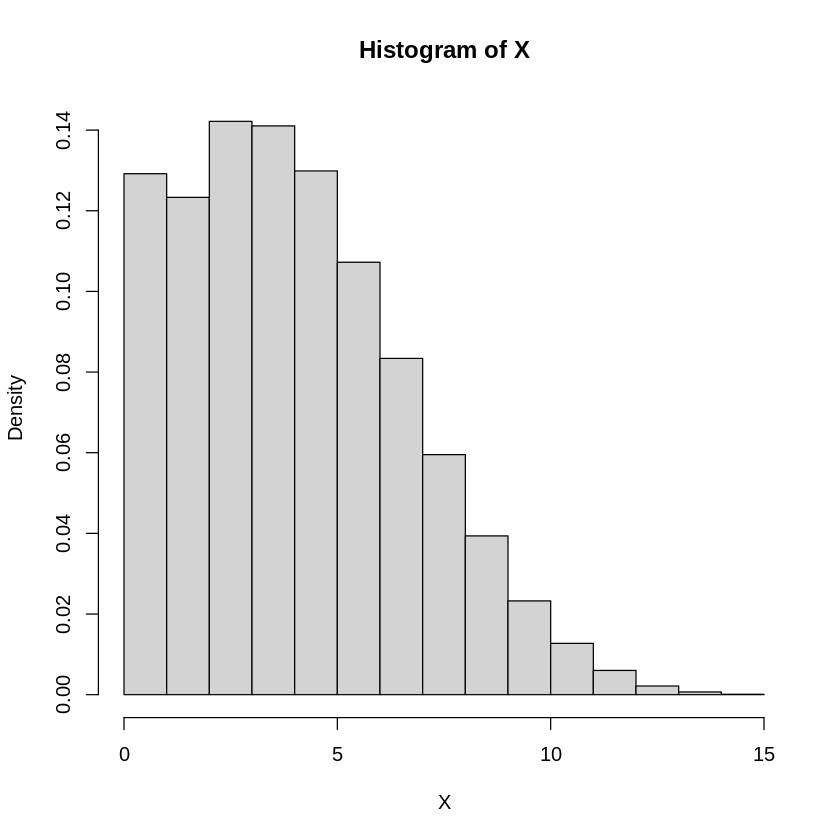

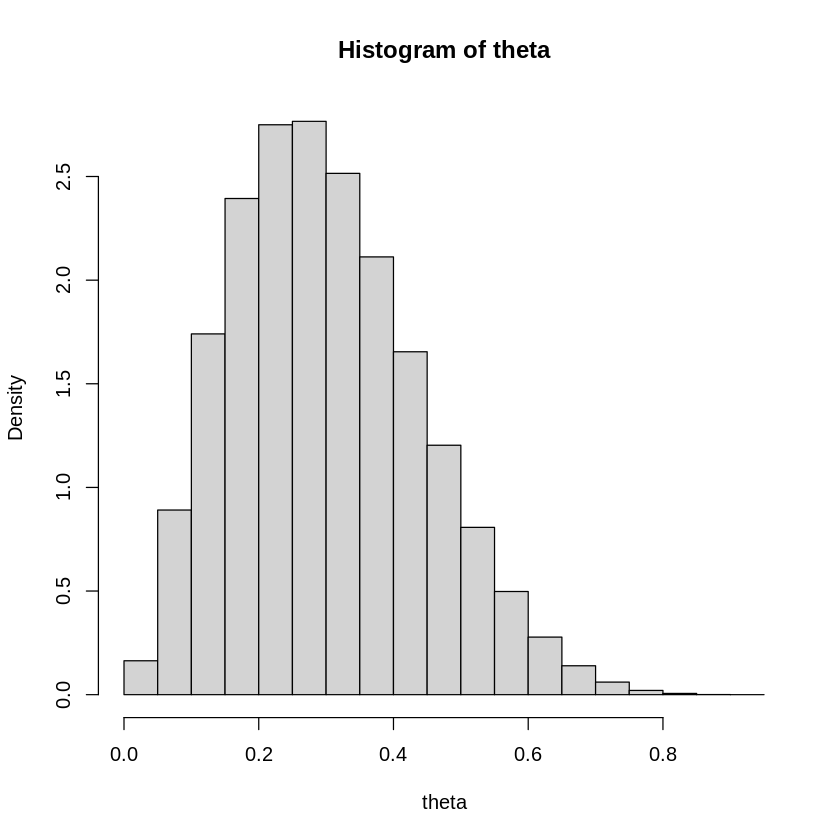

In [ ]:
"
X|θ ∼ Bin(m,θ)
θ ∼ Be(α, β)
"

X = theta = c()

# random params
n = 15
a = 3
b = 7

# init chains
theta[1] = rbeta(1, a, b)
X[1] = rbinom(1, n, theta)

# 500 simulations
for (i in 2:500000) {
  X[i] = rbinom(1, n, theta[i-1]) # using previous theta value
  theta[i] = rbeta(1, X[i] + a, n - X[i] + b) # using conditional distribution
}

hist(X, prob = T)
hist(theta, prob = T)

(c)

In [ ]:
beta_binom = function(n, x) {
  first_frac = (gamma(a + b)/(gamma(a)*gamma(b)))
  second_frac = (gamma(x + a) * gamma(n-x+b))/gamma(a+n+b)
  return ( choose(n, x) * first_frac * second_frac)
}

In [ ]:
x.seq = 0:15; x.seq

[1]  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15

In [ ]:
beta_binom(n, x.seq)

[1] 0.0415019763 0.0889328063 0.1245059289 0.1419804452 0.1419804452
 [6] 0.1286175798 0.1071813165 0.0826827298 0.0590590927 0.0388679499
[11] 0.0233207700 0.0125276863 0.0058462536 0.0022485591 0.0006424455
[16] 0.0001040150

In [ ]:
values = beta_binom(n, x.seq); values

[1] 0.0415019763 0.0889328063 0.1245059289 0.1419804452 0.1419804452
 [6] 0.1286175798 0.1071813165 0.0826827298 0.0590590927 0.0388679499
[11] 0.0233207700 0.0125276863 0.0058462536 0.0022485591 0.0006424455
[16] 0.0001040150

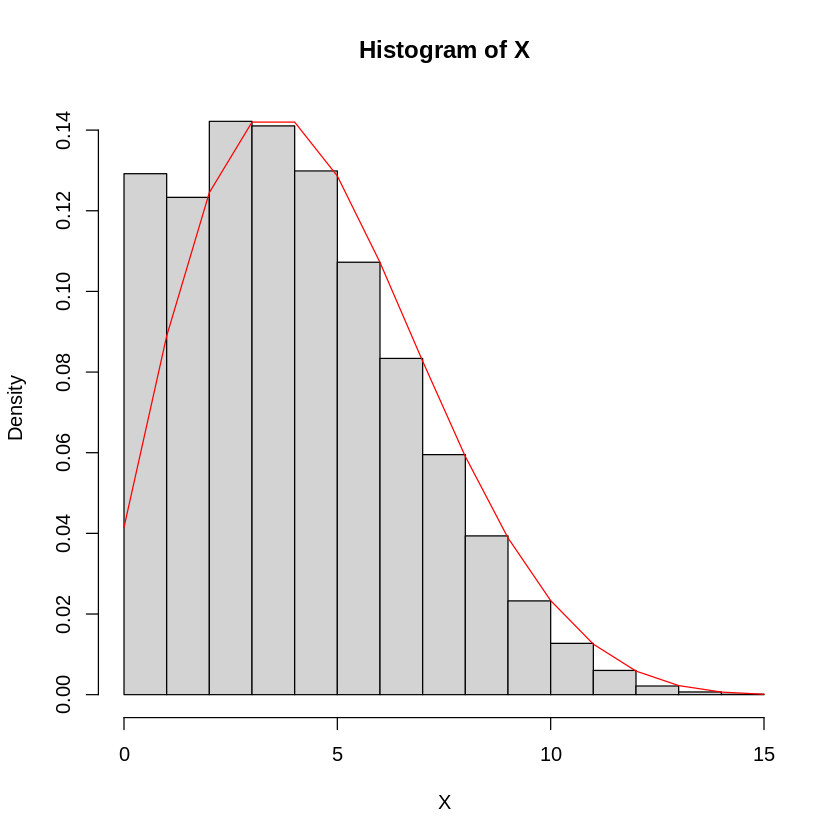

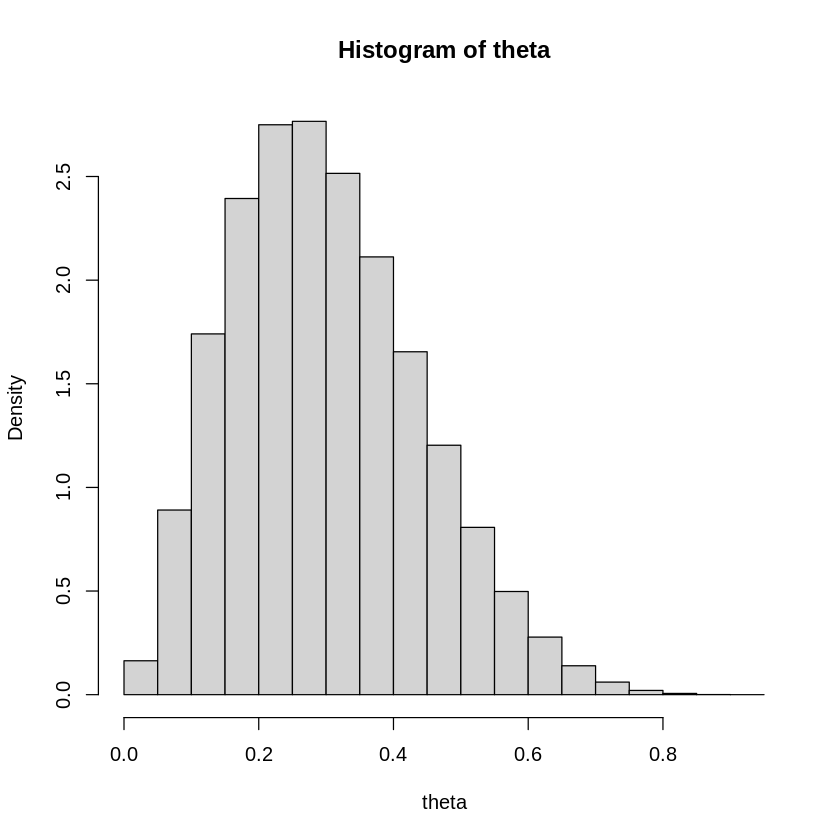

In [ ]:
hist(X, prob = T)
lines(x.seq, values, col = 'red')

hist(theta, xprob = T)
# lines(x.seq, values, col = 'red')
# curve(dbeta(x,a,b),add=T, col="red",lwd=2)

# lines(1, beta_binom(n, 1))
# curve(beta_binom(n,1))

Question 3

In [ ]:
install.packages("invgamma")
library("invgamma")
set.seed(1)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
sigma_conditional = theta_conditional = c()
a = 0.1
b = 0.1
t_thingo_sq = 10^2
theta_zero = 0

x=c(91,504,557,609,693,727,764,803,857,929,
   970,1043,1089,1195,1384,1713)

n = length(x)

# init distributions
sigma_sq = 1/rgamma(1, shape = a, rate = b)
sigma_conditional[1] = sigma_sq
# sigma_sq = sigma_conditional[i-1]
# theta = rnorm(1, mean = theta_zero, sd = sqrt(t_thingo_sq))
# x = rnorm(n, mean = theta, sd = sqrt(sigma_sq))

# theta conditional
theta_conditional_mean = (sigma_sq/(sigma_sq+n*t_thingo_sq))*theta_zero + (n*t_thingo_sq*mean(x))/(sigma_sq + n+ t_thingo_sq)
theta_conditional_var = (sigma_sq * t_thingo_sq)/(sigma_sq + n*t_thingo_sq)
theta_conditional[1] = rnorm(1, mean = theta_conditional_mean, sd = sqrt(theta_conditional_var))


for (i in 2:5000) {

  # init distributions
  sigma_sq = sigma_conditional[i-1]
  # theta = rnorm(1, mean = theta_zero, sd = sqrt(t_thingo_sq))
  # x = rnorm(n, mean = theta, sd = sqrt(sigma_sq))

  # theta conditional
  theta_conditional_mean = (sigma_sq/(sigma_sq+n*t_thingo_sq))*theta_zero + (n*t_thingo_sq*mean(x))/(sigma_sq + n+ t_thingo_sq)
  theta_conditional_var = (sigma_sq * t_thingo_sq)/(sigma_sq + n*t_thingo_sq)
  theta_conditional[i] = rnorm(1, mean = theta_conditional_mean, sd = sqrt(theta_conditional_var))

  # sigma conditional
  shape = (n/2)+a
  scale = (2*b + sum((x-theta_conditional[i])^2))/2
  sigma_conditional[i] = 1/rgamma(1, shape = shape, rate = scale)

  # fillna
  # sigma_conditional[is.na(sigma_conditional)] = 0
  # theta_conditional[is.na(theta_conditional)] = 0

}

# print(theta_conditional)
# print(sigma_conditional)

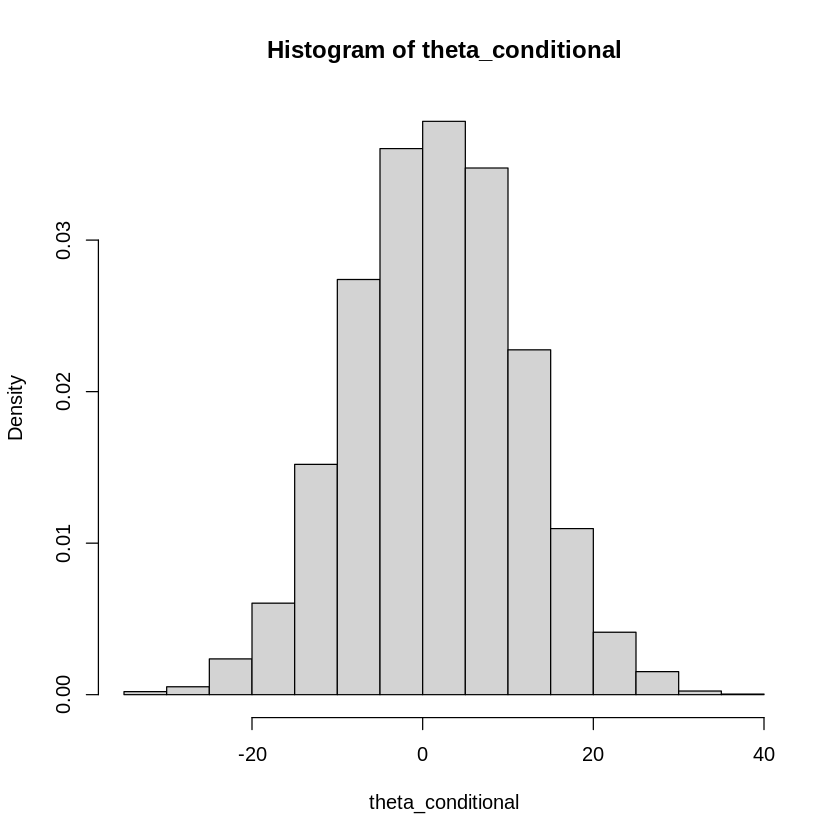

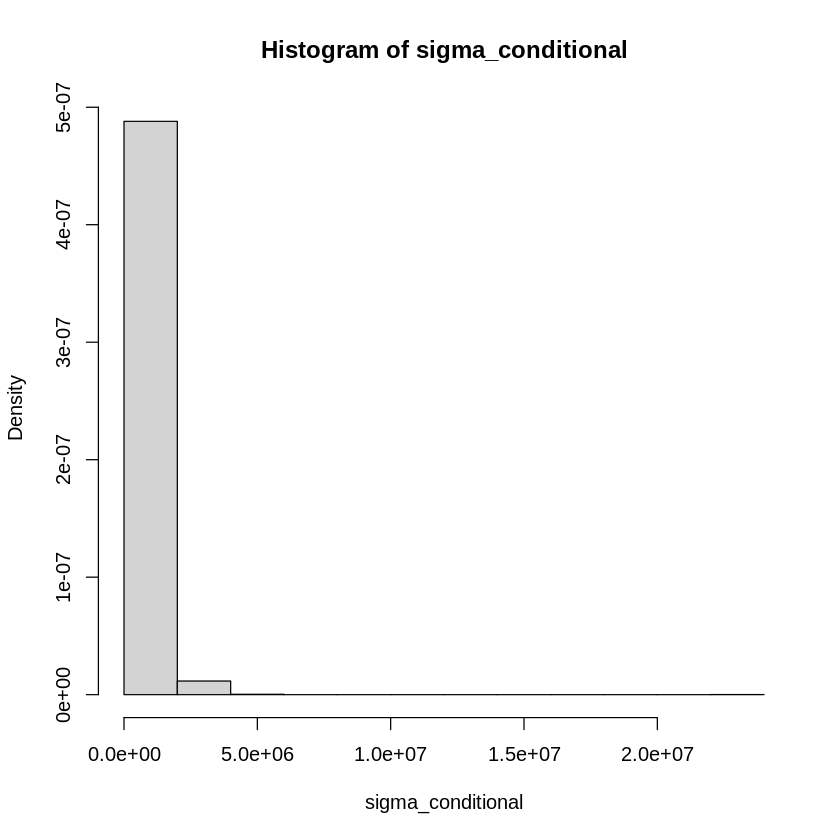

In [ ]:
hist(theta_conditional, prob = T)
hist(sigma_conditional, prob = T)

redo

In [ ]:
# question 1

alpha = 0.5
beta = 0.25

init = 1

mpt = matrix(c(1-alpha, alpha, beta, 1-beta), nrow = 2)

chain = c(init)
for (t in 2:200) {
  chain = c(chain, sample(c(1,2), 1, prob = mpt[chain[t-1],]))
}

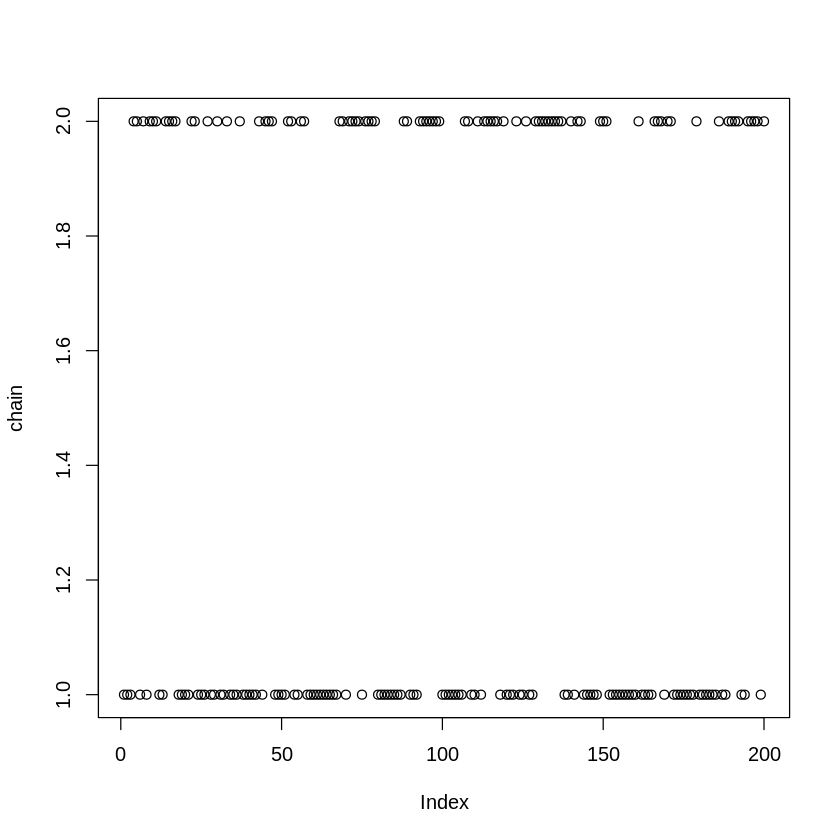

In [ ]:
plot(chain)

question 2

In [ ]:
a = 2
b = 5
n = 15
m = n
S = 1e5

theta = NULL
x = NULL
theta[1] = rbeta(1, a, b)
x[1] = rbinom(1, m, theta[1])

for (i in 2:S) {
  theta[i] = rbeta(1, x[i-1] + a, n - x[i-1] + b)
  x[i] = rbinom(1, n, theta[i-1])
}

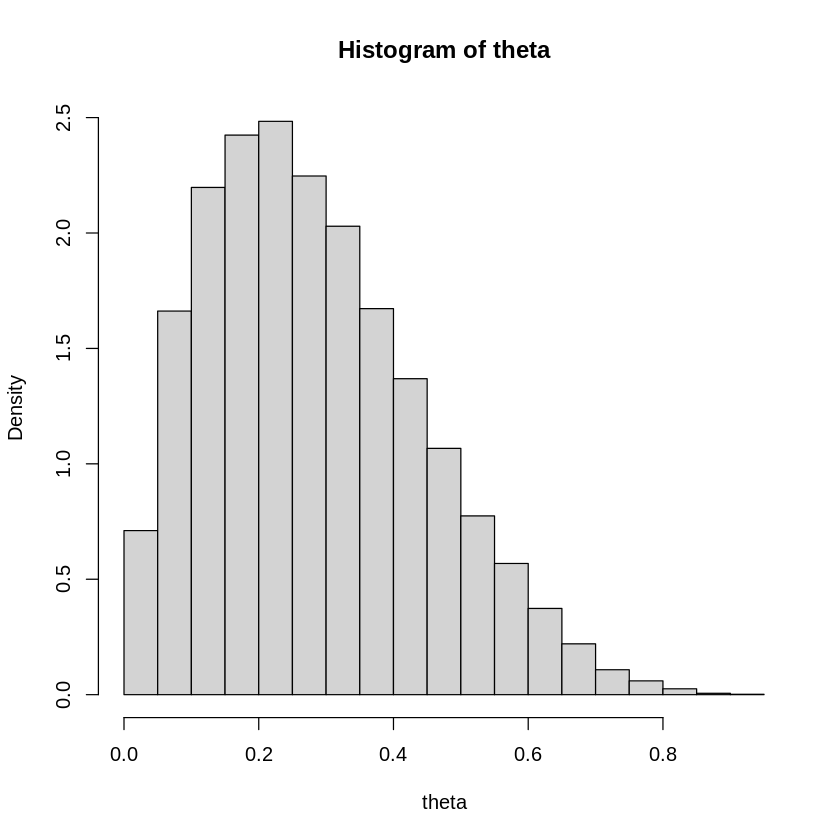

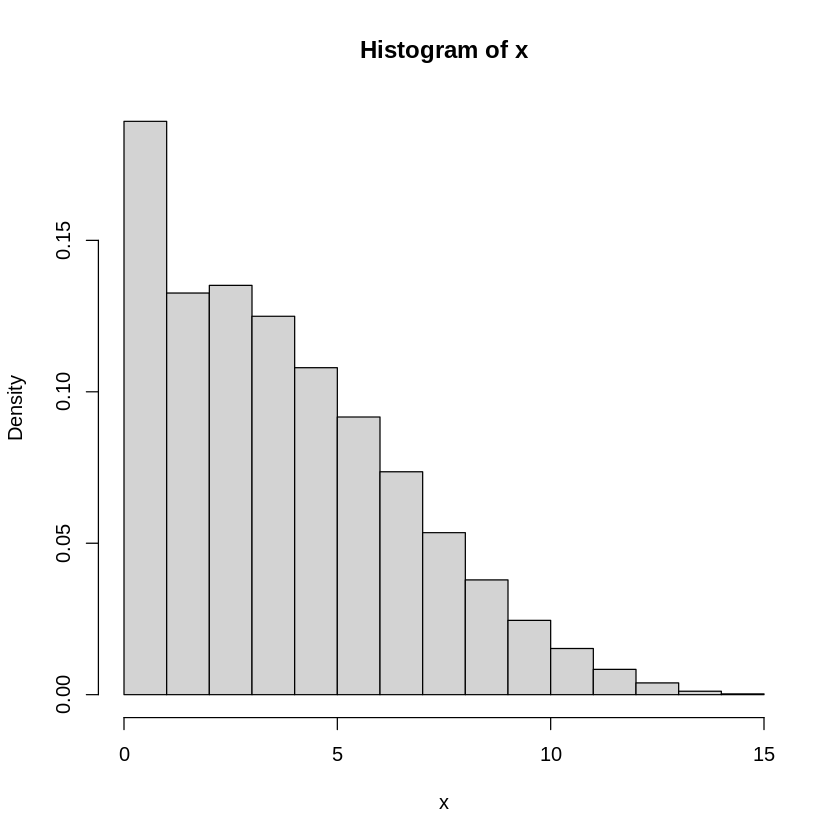

In [ ]:
hist(theta, prob = T)
hist(x, prob = T)

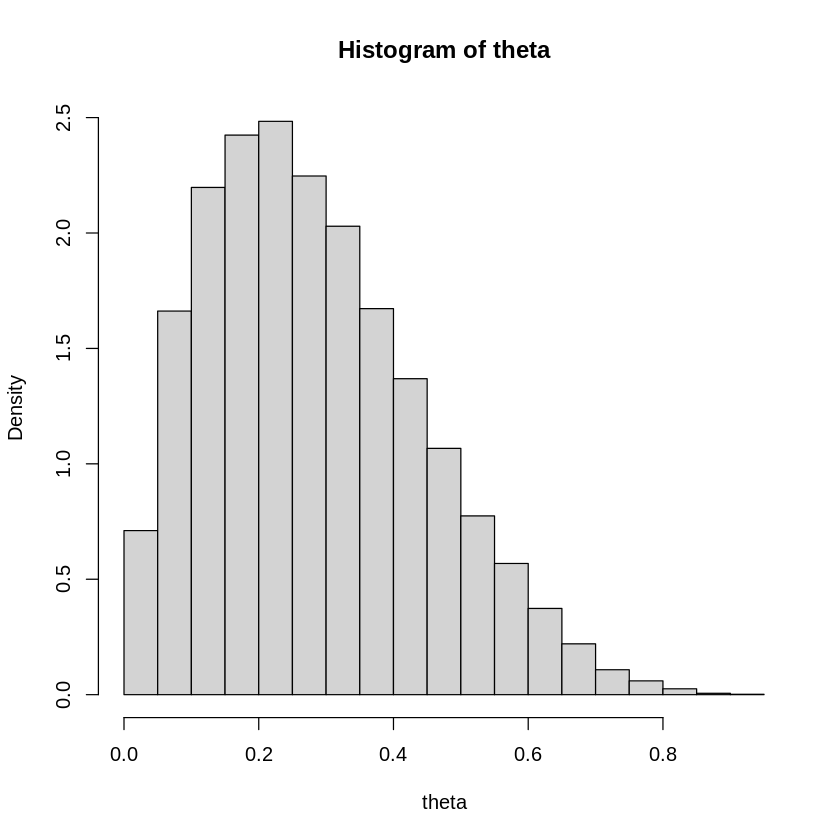

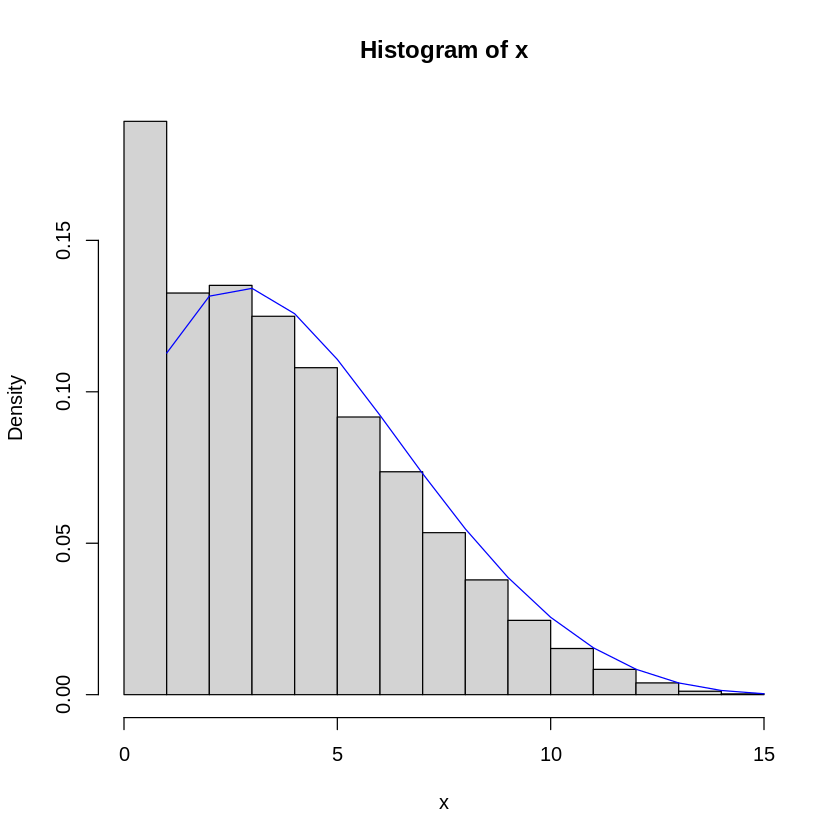

In [ ]:
# (b)

betabi = function(x,alpha,beta,n){
  choose(n, x) * (gamma(alpha + beta) * gamma(x+alpha) * gamma(n-x+beta))/(gamma(alpha)*gamma(beta)*gamma(alpha+n+beta))
}

hist(theta, prob  = T)
x_line = seq(1, n, length = 1e3)
lines(x_line, dbeta(x_line,a,b), col = 'blue')

hist(x, prob  = T)
x_line = 1:n
lines(x_line, betabi(x_line,a,b,n), col = 'blue')

question 3

In [ ]:
x=c(91,504,557,609,693,727,764,803,857,929,
   970,1043,1089,1195,1384,1713)

S = 1e3

n = length(x)

x_bar = mean(x)


tau_sq = 100
theta_0 = 0
a = 1e-1
b = 1e-1

In [ ]:
sigma_sq = theta = X = c()

theta[1] = rnorm(1, theta_0, tau_sq)
sigma_sq[1] = 1/rgamma(1, a, b)
X[1] = rnorm(1, theta, sigma_sq)

for (i in 2:S) {

  theta[i] = rnorm(1, (n*x_bar*tau_sq + theta_0*sigma_sq[i-1])/(sigma_sq[i-1] + n*tau_sq), (sigma_sq[i-1]*tau_sq)/(sigma_sq[i-1] + n*tau_sq))

  first = sum((x-theta)^2)
  second = 2*b
  rate = (1/2)*first*second
  sigma_sq[i] = 1/rgamma(1, a + n/2, rate)

}


Warning message in x - theta:
“longer object length is not a multiple of shorter object length”
Warning message in x - theta:
“longer object length is not a multiple of shorter object length”
Warning message in x - theta:
“longer object length is not a multiple of shorter object length”
Warning message in x - theta:
“longer object length is not a multiple of shorter object length”
Warning message in x - theta:
“longer object length is not a multiple of shorter object length”
Warning message in x - theta:
“longer object length is not a multiple of shorter object length”
Warning message in x - theta:
“longer object length is not a multiple of shorter object length”
Warning message in x - theta:
“longer object length is not a multiple of shorter object length”
Warning message in x - theta:
“longer object length is not a multiple of shorter object length”
Warning message in x - theta:
“longer object length is not a multiple of shorter object length”
Warning message in x - theta:
“longer ob

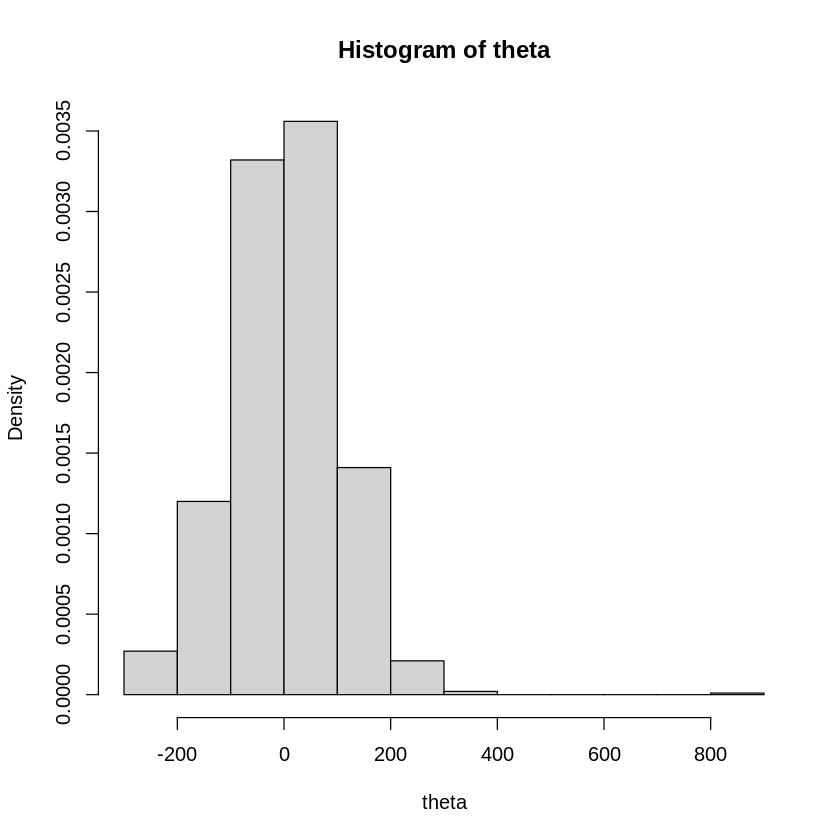

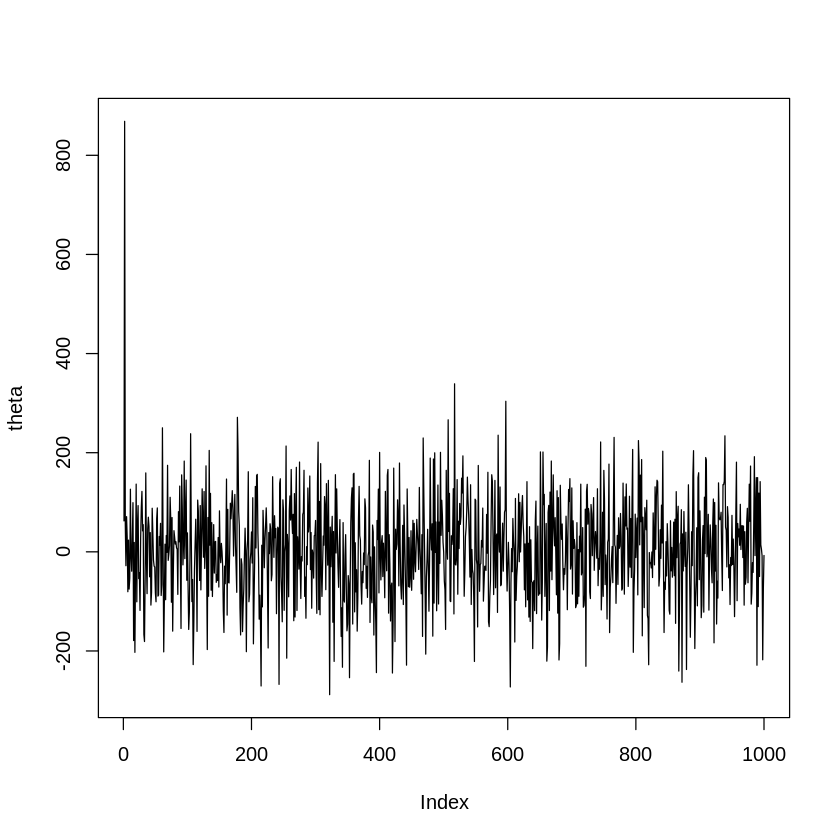

In [ ]:
hist(theta, prob = T)
plot(theta, type = 'l')

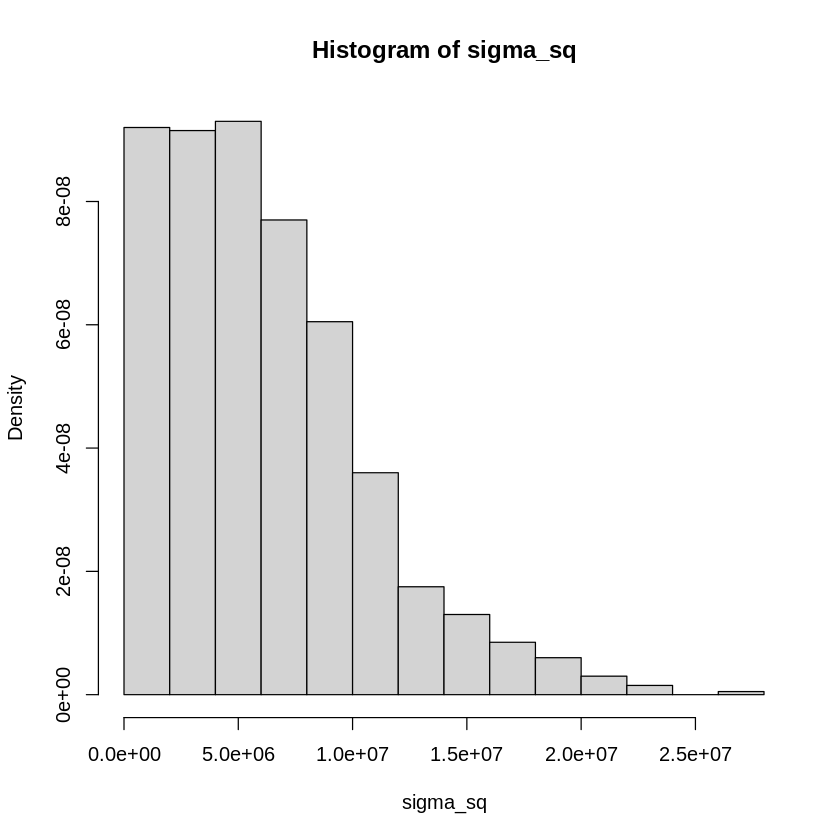

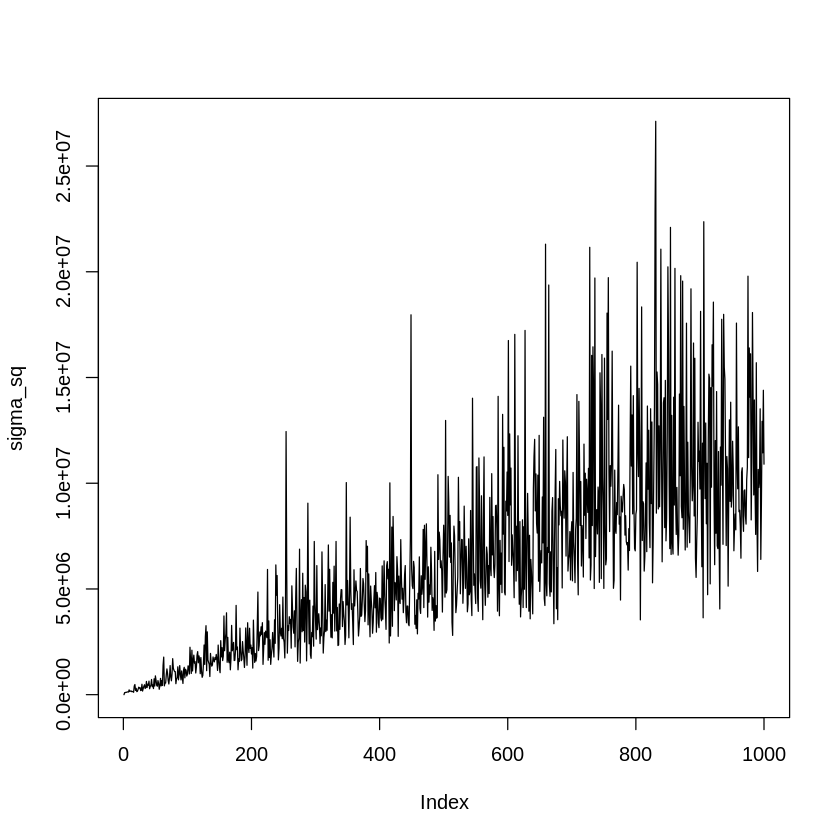

In [ ]:
hist(sigma_sq, prob = T)
plot(sigma_sq, type = 'l')